In [22]:
import numpy as np
import common
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2
plt.rcParams["font.size"] = 30
np.random.seed(100)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [23]:
xs, ys = common.generate_observed_dataset()

In [24]:
real_xs, real_ys = common.generate_real_dataset()

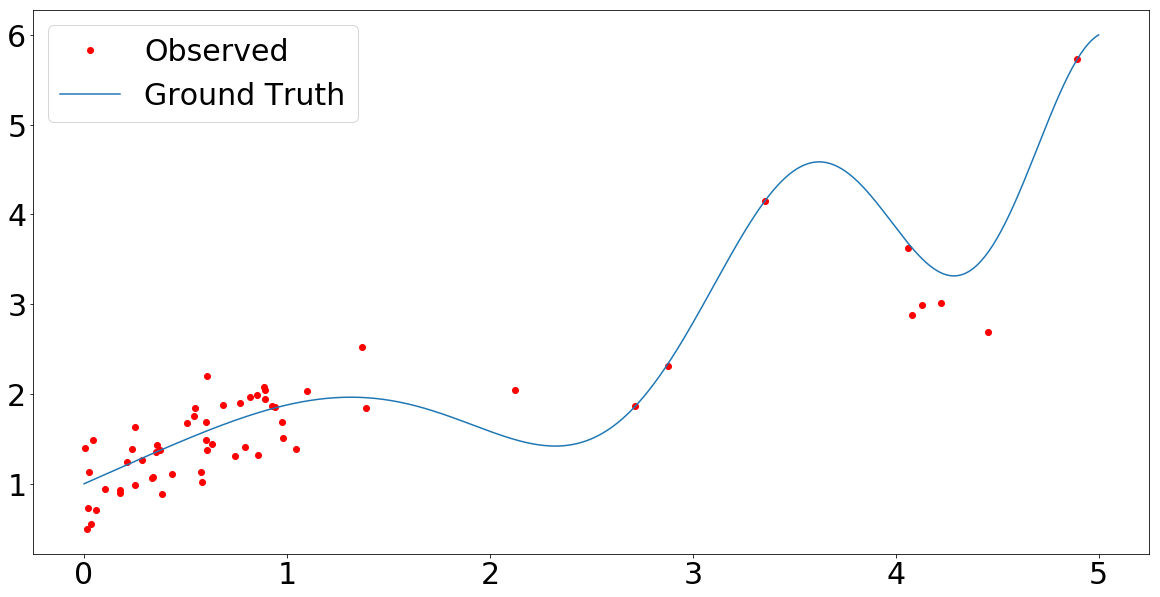

In [25]:
plt.figure(figsize=(20, 10))
plt.plot(xs, ys, "ro", label="Observed")
plt.plot(real_xs, real_ys, label="Ground Truth")
plt.legend(loc="best")
plt.show()

In [26]:
from sklearn import gaussian_process
from sklearn.gaussian_process.kernels import Matern, WhiteKernel, ConstantKernel

In [27]:
kernel = ConstantKernel() + Matern(length_scale=2, nu=3/2) + WhiteKernel(noise_level=1)

In [28]:
Xs = np.array(xs).reshape(-1, 1)
print(Xs.shape)

(60, 1)


In [29]:
gp = gaussian_process.GaussianProcessRegressor(kernel=kernel)
gp.fit(Xs, ys)

GaussianProcessRegressor(alpha=1e-10, copy_X_train=True,
             kernel=1**2 + Matern(length_scale=2, nu=1.5) + WhiteKernel(noise_level=1),
             n_restarts_optimizer=0, normalize_y=False,
             optimizer='fmin_l_bfgs_b', random_state=None)

In [30]:
gp.kernel_

2.7**2 + Matern(length_scale=0.611, nu=1.5) + WhiteKernel(noise_level=0.101)

In [31]:
x_pred = np.linspace(0, 5, 1000).reshape(-1,1)
y_pred, sigma = gp.predict(x_pred, return_std=True)

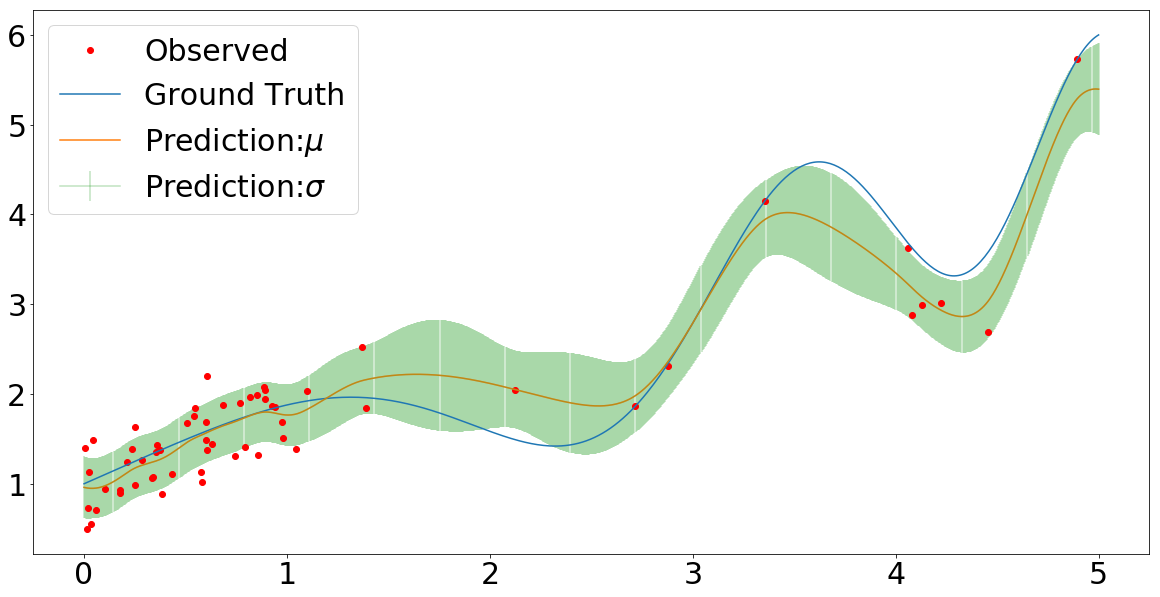

In [32]:
plt.figure(figsize=(20, 10))
plt.plot(xs, ys, "ro", label="Observed")
plt.plot(real_xs, real_ys, label="Ground Truth")
plt.plot(x_pred, y_pred, label="Prediction:$\mu$")
plt.errorbar(x_pred, y_pred, yerr=sigma, label="Prediction:$\sigma$", alpha = 0.3)
plt.legend(loc="best")
plt.show()